In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
mpl.rc('font', family = 'Malgun Gothic') # 그래프 글꼴 설정 (window)
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV    # 교차검증
import numpy as np
from sklearn.metrics import mean_squared_error

In [148]:
pwd

'C:\\Users\\DMC CONET\\saeyun'

In [4]:
path = 'C:/Users/DMC CONET/saeyun/data/air_weather/'

# 데이터 불러오기 - 6시간

<AxesSubplot:xlabel='month', ylabel='PM2.5'>

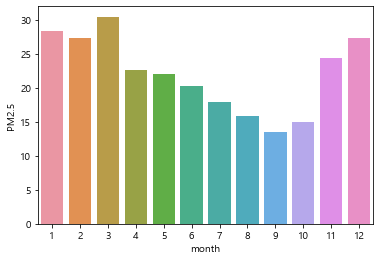

In [73]:
df_input = pd.read_csv(path +'df_input.csv')
p1 = df_input.pivot_table(index='month', values='PM2.5').reset_index()

import seaborn as sns

sns.barplot(data= p1, x='month', y='PM2.5')

In [4]:
df6 = pd.read_csv(path +'df_train_6.csv')
target = pd.read_csv(path +'df_train_target.csv')

df6_test = pd.read_csv(path +'df_test_6.csv')
target_test = pd.read_csv(path +'df_test_target.csv')

# print(f'df6.shape : {df6.shape}\n df12.shape : {df12.shape} \n df24.shape : {df24.shape} \n target.shape : {target.shape}')
print(f'df6.shape : {df6.shape}\n target.shape : {target.shape}')
print(f'df6_test.shape : {df6_test.shape}\n target_test.shape : {target_test.shape}')


df6.shape : (68633, 26)
 target.shape : (68633, 1)
df6_test.shape : (840, 26)
 target_test.shape : (840, 1)


In [5]:
df6['변화량']= df6['PM2.5'] - target['PM2.5']
df6_test['변화량'] =  df6_test['PM2.5'] - target_test['PM2.5']
df6_test['변화량']

# plt.plot(df6['변화량'][:1000])

0       1
1      11
2      18
3      20
4       9
       ..
835    17
836    16
837     5
838     1
839     0
Name: 변화량, Length: 840, dtype: int64

# 데이터나누고 모델링

In [149]:
test_df

,PM10,PM25,오존,이산화질소,일산화탄소,아황산가스,기온,강수량,풍속,풍향,습도,변화량
0,34.0,26.0,0.003,0.05,0.8,0.003,-0.5,0.0,1.1,50.0,64.0,1.0


In [6]:
X_train = df6[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]
y_train = target['PM2.5']

print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')

X_train : (68633, 12), y_train : (68633,)


xgb_model.feature_importances_

In [60]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_#, gsearch.best_score_

hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [37]:
from xgboost import XGBRegressor
X_train = df6[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]
y_train = target['PM2.5']

my_model = XGBRegressor(colsample_bytree = 0.7,
                           learning_rate = 0.01,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 500,
                          objective =  'reg:squarederror',
                          subsample = 0.7)

# 모델 훈련
my_model.fit(X_train, y_train, verbose=False)

# 모델 예측
y_pred = my_model.predict(df6_test[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]) 


In [38]:
df6_test['날짜']

0      2022-11-01 18:00:00
1      2022-11-01 19:00:00
2      2022-11-01 20:00:00
3      2022-11-01 21:00:00
4      2022-11-01 22:00:00
              ...         
835    2022-12-06 13:00:00
836    2022-12-06 14:00:00
837    2022-12-06 15:00:00
838    2022-12-06 16:00:00
839    2022-12-06 17:00:00
Name: 날짜, Length: 840, dtype: object

In [59]:
 Root Mean Squrd Error
print(f'RMSE : {np.sqrt(mean_squared_error(target_test, y_pred))}')

RMSE : 1.4922692691020079


In [ ]:
# Mean Squrd Error
print(f'MSE : {mean_squared_error(y_train, y_train_pred)}')



# Root Mean Absolute Error
print(f'MAE : {mean_absolute_error(y_train, y_train_pred)}')

def Mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

# Mean Absolute Percentage Error
print(f'MAPE : {Mean_absolute_percentage_error(y_train, y_train_pred)}') # Mean_absolute_percentage_error

print(f'R2 : {r2_score(y_train, y_train_pred)}') # r2_score

In [41]:
val = pd.DataFrame(y_pred, columns=['predict'])
val
# my_model.predict(df6_test)
val['날짜'] =  df6_test['날짜'].values
val['answer'] = target_test['PM2.5'].values
val.head(30)

# val.to_csv(path + 'validation.csv', encoding='utf-8-sig', index=False)

,predict,날짜,answer
0,22.839293,2022-11-01 18:00:00,23
1,20.393946,2022-11-01 19:00:00,20
2,21.674856,2022-11-01 20:00:00,21
3,18.380983,2022-11-01 21:00:00,18
4,18.304842,2022-11-01 22:00:00,18
5,16.790180,2022-11-01 23:00:00,16
6,16.361624,2022-11-02 00:00:00,16
7,12.759223,2022-11-02 01:00:00,12
8,12.483344,2022-11-02 02:00:00,12
9,9.989719,2022-11-02 03:00:00,9


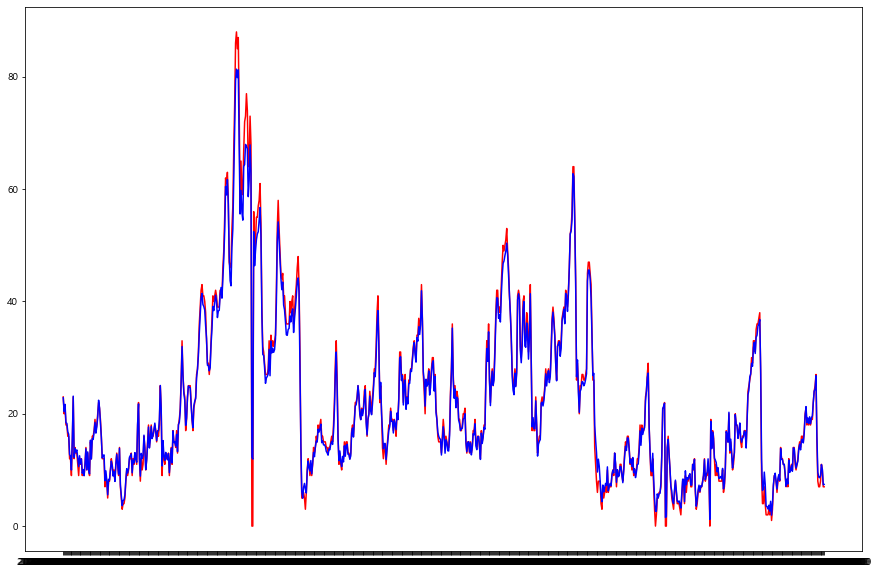

In [45]:
# plt.figure(figsize=(20, 10))
# plt.plot(val['answer'], color='red')
# plt.plot(val['predict'], color='blue')
# plt.show()
plt.figure(figsize=(15, 10))
plt.plot(df6_test['날짜'], val['answer'], color='red')
plt.plot(df6_test['날짜'], val['predict'], color='blue')
plt.show()

In [49]:
import plotly.express as px

df = val
df.head()

,predict,날짜,answer
0,22.839293,2022-11-01 18:00:00,23
1,20.393946,2022-11-01 19:00:00,20
2,21.674856,2022-11-01 20:00:00,21
3,18.380983,2022-11-01 21:00:00,18
4,18.304842,2022-11-01 22:00:00,18


In [147]:
import plotly.express as px

df = px.data.gapminder()
df.head()

In [74]:
fig = px.line(df, x="날짜", y=["answer", 'predict'],
#              title='Life expectancy in Canada',
#              color=["predict", 'answer'],
#              line_group='country',
#              hover_name='country'
             )

fig.show()

In [ ]:
df6_test = pd.read_csv(path +'df_test_6.csv')
target_test = pd.read_csv(path +'df_test_target.csv')

In [26]:
from xgboost import XGBRegressor
X_train = df6[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)']]
y_train = target['PM2.5']

my_model = XGBRegressor(colsample_bytree = 0.7,
                           learning_rate = 0.01,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 500,
                          objective =  'reg:squarederror',
                          subsample = 0.7)

# 모델 훈련
my_model.fit(X_train, y_train, verbose=1)

# 모델 예측
x_test = df6_test[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)']]

y_pred_test = my_model.predict(x_test) 


In [27]:
val = pd.DataFrame(y_pred_test, columns=['predict'])
val
# my_model.predict(df6_test)
# val['날짜'] =  df_test['날짜'].values
val['answer'] = target_test['PM2.5'].values
val.head(30)

# val.to_csv(path + 'validation.csv', encoding='utf-8-sig', index=False)

,predict,answer
0,23.343599,23
1,30.837744,20
2,33.526806,21
3,31.217804,18
4,25.230631,18
5,27.668457,16
6,23.961996,16
7,21.525194,12
8,22.213396,12
9,19.903515,9


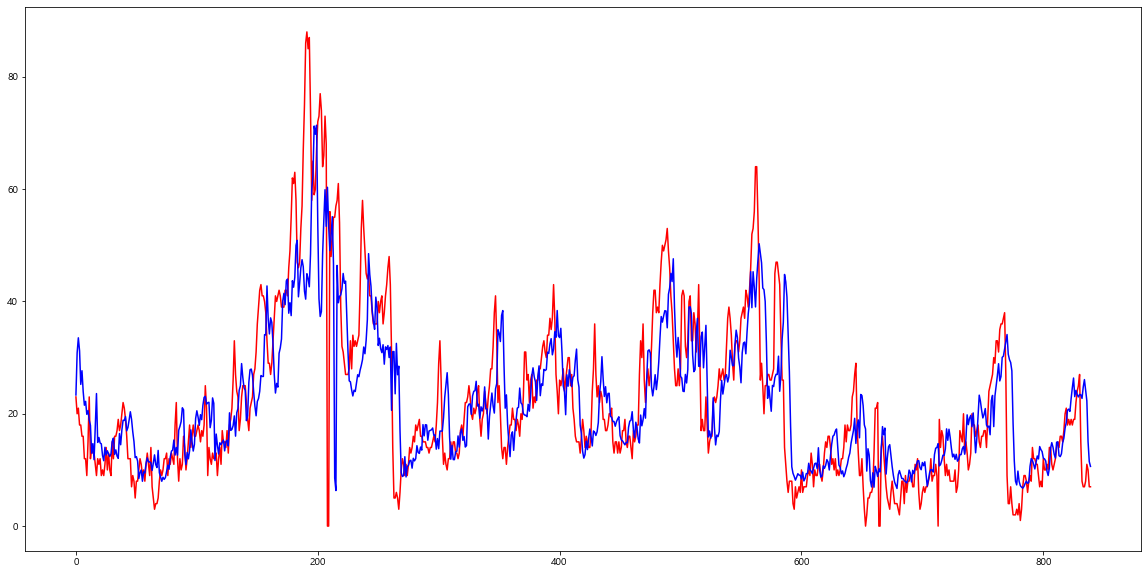

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(val['answer'], color='red')
plt.plot(val['predict'], color='blue')
plt.show()


In [ ]:
params = {'max_depth':[3, 5, 6, 7, 8, 9, 10], 'min_child_weight':[1,3, 5, 7], 'colsample_bytree':[0.5,0.75],
          'n_estimators': [30, 50, 70, 100, 150, 200]
         }
grid_param_xgb1 = {
    'max_depth':[3, 5, 6, 7, 8, 9, 10], 'min_child_weight':[1,3, 5, 7], 'colsample_bytree':[0.5,0.75],
          'n_estimators': [30, 50, 70, 100, 150, 200]
}
hyperparameter_list = {
 'xgbregressor__max_depth':range(5,11),
 'xgbregressor__min_depth':range(5,11)
}
# gridsearchcv 객체 정보 입력(어떤 모델, 파라미터 후보, 교차검증 몇 번)
gridcv = GridSearchCV(xgb_model, param_grid = hyperparameter_list, 
                      cv=5, scoring='neg_root_mean_squared_error',
                        n_jobs=-1,
                        verbose=10)

# 파라미터 튜닝 시작
74


gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='rmse', eval_set=[(X_test, y_test)])

#튜닝된 파라미터 출력
print(f'best_params_ : {gridcv.best_params_}')
print(f'best_params_ : {gridcv.best_score_}')

In [ ]:
df6_test = pd.read_csv(path +'df_test_6.csv')
target_test = pd.read_csv(path +'df_test_target.csv')
print(f'df6_test.shape : {df6_test.shape}\n df6_test.shape : {target_test.shape}')


df6_test = df6_test[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)' ]]
df6_test

In [ ]:
df6_test[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)' ]]


# X_train, _, y_train, _ = train_test_split(X, y, random_state=1234) # , test_size=0.2


In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=300, colsample_bytree = 0.75, max_depth= 7,
                             min_child_weight = 7, learning_rate=0.3)
xgb_model.fit(X_train, y_train)

y_pred_probs = xgb_model.predict(df_test)

In [ ]:
y_pred = xgb_model.predict(df_test)

In [ ]:
val = pd.DataFrame(y_pred, columns=['predict'])
val['answer'] = df_answer.values
val['날짜'] =  df.iloc[68657:]['날짜'].values

val
# val.to_csv(path + 'validation.csv', encoding='utf-8-sig', index=False)

In [ ]:
plt.figure(figsize=(50, 15))
plt.plot(val['날짜'],val['answer'], color='red')
plt.plot(val['날짜'], val['predict'], color='blue')
plt.show()


# 2.5, 6_2.5 차이를 목표변수로 설정

12

In [34]:
df12 = pd.read_csv(path +'df_train_12.csv')
target = pd.read_csv(path +'df_train_target.csv')

df12_test = pd.read_csv(path +'df_test_12.csv')
target_test = pd.read_csv(path +'df_test_target.csv')

print(f'df12.shape : {df12.shape}\n df12.shape : {df12.shape}')

df12.shape : (68633, 26)
 df12.shape : (68633, 26)


In [35]:

print(f'df12.shape : {df12.shape}\n target.shape : {target.shape}')
print(f'df12_test.shape : {df12_test.shape}\n target_test.shape : {target_test.shape}')

df12['변화량']= df12['PM2.5'] - target['PM2.5']
df12_test['변화량'] =  df12_test['PM2.5'] - target_test['PM2.5']
df12_test['변화량']

df12.shape : (68633, 26)
 target.shape : (68633, 1)
df12_test.shape : (840, 26)
 target_test.shape : (840, 1)


0       8
1      18
2      27
3      25
4      11
       ..
835    11
836     7
837     9
838    12
839    15
Name: 변화량, Length: 840, dtype: int64

In [36]:
X_train = df12[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]
y_train = target['PM2.5']

print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')

X_train : (68633, 12), y_train : (68633,)


In [37]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_#, gsearch.best_score_

hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [13]:
from xgboost import XGBRegressor
X_train = df12[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]
y_train = target['PM2.5']

my_model = XGBRegressor(colsample_bytree = 0.7,
                           learning_rate = 0.01,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 500,
                          objective =  'reg:squarederror',
                          subsample = 0.7)

# 모델 훈련
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [14]:
# 모델 예측
y_pred = my_model.predict(df12_test[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]) 

In [15]:
print(f'RMSE : {np.sqrt(mean_squared_error(target_test, y_pred))}')


RMSE : 1.5647197348306054


In [16]:
val = pd.DataFrame(y_pred, columns=['predict'])
val
# my_model.predict(df12_test)
val['날짜'] =  df12_test['날짜'].values
val['answer'] = target_test['PM2.5'].values
val.head(30)


,predict,날짜,answer
0,22.783464,2022-11-01 12:00:00,23
1,19.987478,2022-11-01 13:00:00,20
2,20.570620,2022-11-01 14:00:00,21
3,18.606892,2022-11-01 15:00:00,18
4,17.696835,2022-11-01 16:00:00,18
5,16.519035,2022-11-01 17:00:00,16
6,16.114185,2022-11-01 18:00:00,16
7,13.301081,2022-11-01 19:00:00,12
8,12.997109,2022-11-01 20:00:00,12
9,10.294952,2022-11-01 21:00:00,9


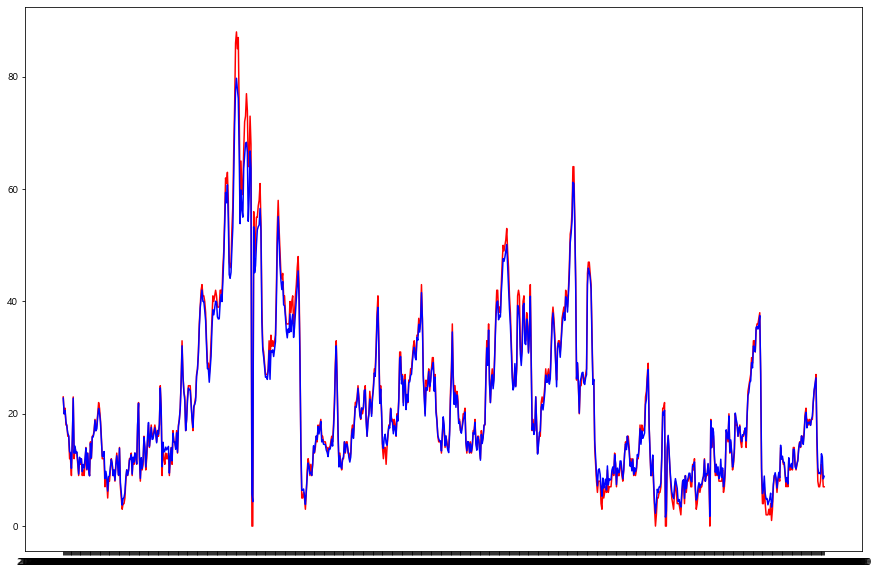

In [17]:

# val.to_csv(path + 'validation.csv', encoding='utf-8-sig', index=False)

# plt.figure(figsize=(20, 10))
# plt.plot(val['answer'], color='red')
# plt.plot(val['predict'], color='blue')
# plt.show()
plt.figure(figsize=(15, 10))
plt.plot(df12_test['날짜'], val['answer'], color='red')
plt.plot(df12_test['날짜'], val['predict'], color='blue')
plt.show()

24

In [38]:
df24 = pd.read_csv(path +'df_train_24.csv')
target = pd.read_csv(path +'df_train_target.csv')

df24_test = pd.read_csv(path +'df_test_24.csv')
target_test = pd.read_csv(path +'df_test_target.csv')

In [39]:

# print(f'df24.shape : {df24.shape}\n df24.shape : {df24.shape} \n df24.shape : {df24.shape} \n target.shape : {target.shape}')
print(f'df24.shape : {df24.shape}\n target.shape : {target.shape}')
print(f'df24_test.shape : {df24_test.shape}\n target_test.shape : {target_test.shape}')


df24.shape : (68633, 26)
 target.shape : (68633, 1)
df24_test.shape : (840, 26)
 target_test.shape : (840, 1)


In [40]:

df24['변화량']= df24['PM2.5'] - target['PM2.5']
df24_test['변화량'] =  df24_test['PM2.5'] - target_test['PM2.5']
df24_test['변화량']

# plt.plot(df24['변화량'][:1000])

X_train = df24[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]
y_train = target['PM2.5']

In [41]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_#, gsearch.best_score_

hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

X_train : (68633, 12), y_train : (68633,)
RMSE : 1.6097527650421355


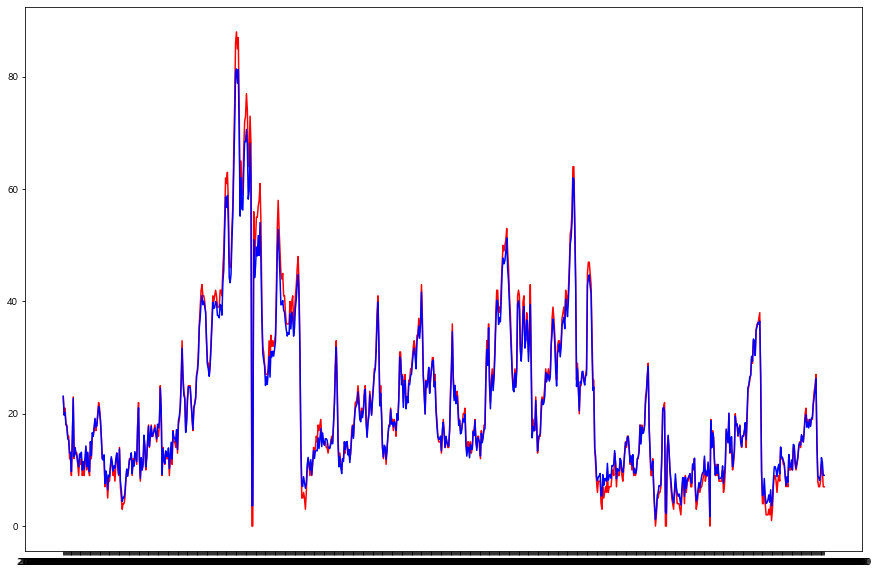

In [42]:


print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')

from xgboost import XGBRegressor
X_train = df24[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]
y_train = target['PM2.5']

my_model = XGBRegressor(colsample_bytree = 0.7,
                           learning_rate = 0.01,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 500,
                          objective =  'reg:squarederror',
                          subsample = 0.7)

# 모델 훈련
my_model.fit(X_train, y_train, verbose=False)

# 모델 예측
y_pred = my_model.predict(df24_test[['PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '변화량']]) 


#  Root Mean Squrd Error
print(f'RMSE : {np.sqrt(mean_squared_error(target_test, y_pred))}')

val = pd.DataFrame(y_pred, columns=['predict'])
val
# my_model.predict(df24_test)
val['날짜'] =  df24_test['날짜'].values
val['answer'] = target_test['PM2.5'].values
val.head(30)

# val.to_csv(path + 'validation.csv', encoding='utf-8-sig', index=False)

# plt.figure(figsize=(20, 10))
# plt.plot(val['answer'], color='red')
# plt.plot(val['predict'], color='blue')
# plt.show()
plt.figure(figsize=(15, 10))
plt.plot(df24_test['날짜'], val['answer'], color='red')
plt.plot(df24_test['날짜'], val['predict'], color='blue')
plt.show()

In [142]:
PM10_input = input('PM10을 입력해 주세요 : ')
PM25_input = input('PM2.5를 입력해 주세요 : ')
오존_input = input('오존을 입력해 주세요 : ')
이산화질소_input = input('이산화질소를 입력해 주세요 : ')
일산화탄소_input = input('일산화탄소를 입력해 주세요 : ')
아황산가스_input = input('아황산가스를입력해 주세요 : ')
기온_input = input('기온을입력해 주세요 : ')
강수량_input = input('강수량을 입력해 주세요 : ')
풍속_input = input('풍속을 입력해 주세요 : ')
풍향_input = input('풍향 입력해 주세요 : ')
습도_input = input('습도를입력해 주세요 : ')
변화량_input = input('변화량을 입력해 주세요 : ')

arr = [[PM10_input,PM25_input,오존_input,이산화질소_input,일산화탄소_input,아황산가스_input,기온_input,강수량_input,풍속_input,풍향_input,습도_input,변화량_input]]

PM10을 입력해 주세요 : 34
PM2.5를 입력해 주세요 : 26
오존을 입력해 주세요 : 0.003
이산화질소를 입력해 주세요 : 0.050
일산화탄소를 입력해 주세요 : 0.8
아황산가스를입력해 주세요 : 0.003
기온을입력해 주세요 : -0.5
강수량을 입력해 주세요 : 0
풍속을 입력해 주세요 : 1.1
풍향 입력해 주세요 : 50
습도를입력해 주세요 : 64
변화량을 입력해 주세요 : 1


In [143]:
test_df = pd.DataFrame(arr, columns=['PM10', 
                                'PM25', '오존', '이산화질소', '일산화탄소', '아황산가스',
                                '기온', '강수량', '풍속','풍향', '습도', '변화량'])
test_df

,PM10,PM25,오존,이산화질소,일산화탄소,아황산가스,기온,강수량,풍속,풍향,습도,변화량
0,34,26,0.003,0.050,0.8,0.003,-0.5,0,1.1,50,64,1




test_df['PM10'] =  float(PM10_input)
test_df['PM25'] = float(PM25_input)
test_df['오존'] = float(오존_input)
test_df['이산화질소'] = float(이산화질소_input)
test_df['일산화탄소'] = float(일산화탄소_input)
test_df['아황산가스'] = float(아황산가스_input)
test_df['기온'] = float(기온_input)
test_df['강수량'] = float(강수량_input)
test_df['풍속'] = float(풍속_input)
test_df['풍향'] = float(풍향_input)
test_df['습도'] = float(습도_input)
test_df['변화량'] = float(변화량_input)

test_df

In [144]:
input_arr = np.array([PM10_input,
PM25_input,
오존_input,
이산화질소_input,
일산화탄소_input,
아황산가스_input,
기온_input,
강수량_input,
풍속_input,
풍향_input,
습도_input,
변화량_input])

In [145]:
test_df = test_df.astype(float)

In [146]:
# 변수 정의할 때 주의하자 태윤아.... 화이팅~~~~ 디제이맥스 열심히하구
result = my_model.predict(test_df) 

print(f'24시간후의 미세먼지(PM2.5)는 {result} 입니다.')

24시간후의 미세먼지(PM2.5)는 [25.50413] 입니다.
